<a href="https://colab.research.google.com/github/diyorarti/classification-problem/blob/main/Logistic_regression_development_for_prediction_of_airplane_passengers_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score, jaccard_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('/content/train_dataset.csv')
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


# Data prepariation

In [ ]:
data.shape

(10000, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [ ]:
encoder = OrdinalEncoder()

cat_col = data[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
data[['Gender', 'Customer Type', 'Type of Travel', 'Class']]=encoder.fit_transform(cat_col)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
data.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [ ]:
data = data.fillna({'Arrival Delay in Minutes':np.mean(data['Arrival Delay in Minutes'])})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  float64
 2   Customer Type                      10000 non-null  float64
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  float64
 5   Class                              10000 non-null  float64
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [ ]:
drop_colm = ['id', 'satisfaction']

x = data.drop(drop_colm, axis=1).sample(100, random_state=1)
y = data[['satisfaction']].sample(100, random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = (80, 22)
x_test = (20, 22)
y_train = (80, 1)
y_test = (20, 1)


# Logistic regression without sklearn
with gradent descent

In [ ]:
def sigmoid(z):
  g = 1 / (1 + np.exp(-z))
  return g

In [ ]:
def cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    z = np.dot(x[i], w) + b
    f_wb = sigmoid(z)
    cost = cost + ( - y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb))

  cost = cost / m
  return cost

In [ ]:
def gradient(x, y, w, b):
  m, n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0
  for i in range(m):
    z = np.dot(x[i], w)+b
    f_wb = sigmoid(z)
    err = f_wb - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err *x[i, j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, iter, cost, gradient):
  J_hist = []
  w = copy.deepcopy(w_in)
  b = b_in
  for i in range(iter):
    dj_dw, dj_db = gradient(x, y, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i < 10000:
      J_hist.append(cost(x, y, w, b))
  return J_hist, w, b

In [ ]:
m,n = x_train.shape
w = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
b = 0
alpha = 0.00001
iter = 1000
len(w)

22

In [ ]:
J_hist , w , b = gradient_descent(x_train, y_train, w, b, alpha, iter, cost, gradient)

In [ ]:
print(J_hist)

[array([0.87553511]), array([1.71981261]), array([2.22919418]), array([0.74787946]), array([1.39822071]), array([1.50774585]), array([2.28912053]), array([0.71645629]), array([1.16109516]), array([1.69974212]), array([2.23414426]), array([0.73948111]), array([1.35359225]), array([1.54080066]), array([2.28007477]), array([0.71527639]), array([1.16793439]), array([1.68734204]), array([2.23638632]), array([0.73285384]), array([1.31877352]), array([1.56385342]), array([2.27261647]), array([0.71358667]), array([1.16920566]), array([1.67869648]), array([2.23735123]), array([0.72714851]), array([1.28883574]), array([1.58184826]), array([2.26606809]), array([0.71165624]), array([1.16747552]), array([1.67220945]), array([2.2376063]), array([0.7220313]), array([1.26181341]), array([1.59672744]), array([2.26013172]), array([0.7096042]), array([1.16387107]), array([1.66713472]), array([2.2374124]), array([0.71734594]), array([1.23680898]), array([1.60937246]), array([2.25467536]), array([0.7074823

In [ ]:
w_out = w
print(w_out)

[ 1.14917189e-04 -3.66823338e-04 -1.69594550e-02 -1.09983734e-03
 -1.51538126e-03  4.63633583e-04  1.52316446e-03 -2.64027123e-03
 -7.71117625e-05 -2.05571630e-03  1.43258823e-04  1.29531786e-03
 -1.24232306e-04  7.16542665e-04 -2.48889862e-04 -1.76767508e-04
 -1.13351045e-03  1.07452487e-04 -1.62040685e-03  3.60001890e-04
 -1.31975300e-02 -1.79433333e-02]


In [ ]:
b_out = b
print(b_out)

[-0.00063136]


In [ ]:
def predict(x, w, b):
  m = x.shape[0]
  p = np.zeros(m)
  for i in range(m):
    f_wb = sigmoid(np.dot(x[i], w)+ b)
    if f_wb > 0.5:
      p[i] = 1
    else:
      p[i] = 0
  return p

In [ ]:
predictions = predict(x_train, w_out, b_out)

In [ ]:
acc = accuracy_score(y_train, predictions )
print(f'accuracy {acc}')

accuracy 0.6375


# Regularization

In [ ]:
def cost_reg(x, y, w, b, lambda_):
  m, n = x.shape
  cost = 0
  reg_cost = 0

  for i in range(m):
    z = np.dot(x[i], w) + b
    f_wb = sigmoid(z)
    cost += -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
  cost = cost / m

  for j in range(n):
    reg_cost += (w[j]**2)
  reg_cost = (lambda_ / (2 * m)) * reg_cost

  total_cost = cost + reg_cost
  return total_cost

In [ ]:
def gradient_reg(x, y, w, b, lambda_):
  m, n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    z = np.dot(x[i], w) + b
    f_wb = sigmoid(z)
    err = f_wb - y[i]

    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x[i, j]
    dj_db = dj_db + err

  for j in range(n):
    dj_dw[j] = dj_dw[j] + (lambda_ / m) * w[j]

  return dj_dw, dj_db

In [ ]:
def gradient_descent_reg(x, y, w_in, b_in, alpha, iter, cost_reg, gradient_reg, lambda_):
  J_hist = []
  w = copy.deepcopy(w_in)
  b = b_in

  for i in range(iter):
    dj_dw, dj_db = gradient_reg(x, y, w, b, lambda_)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i < 1000:
      J_hist.append(cost_reg(x, y, w, b, lambda_))
  return w, b, J_hist

In [ ]:
lambda_ = 0.00001
iter = 10
alpha = 0.0000001
w_reg, b_reg, J_hist = gradient_descent_reg(x_train, y_train, w_out, b_out, alpha, iter, cost_reg, gradient_reg, lambda_)

In [ ]:
print(J_hist)

[array([0.76684577]), array([1.0211065]), array([1.63192203]), array([0.63081178]), array([0.66927483]), array([0.85280241]), array([1.46195043]), array([0.68280573]), array([0.96876068]), array([1.00247256])]


In [ ]:
predictions_reg = predict(x_train, w_reg, b_reg)

In [ ]:
accuracy_score(y_train, predictions_reg)

0.525

# Logistic Regression
with sklearn

In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
drop_colm = ['id', 'satisfaction']

x = data.drop(drop_colm, axis=1)
y = data[['satisfaction']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (6000, 22)
x_test = (4000, 22)
y_train = (6000, 1)
y_test = (4000, 1)


In [ ]:
model = LogisticRegression()

model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_yhat = model.predict(x_train)
train_acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy score {train_acc}')

test_yhat = model.predict(x_test)
test_acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy score {test_acc}')

train accuracy score 0.817
test accuracy score 0.81025


# Model development

# StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
model = LogisticRegression()

model.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
train_yhat = model.predict(x_train_scaled)
train_acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy score {train_acc}')

test_yhat = model.predict(x_test_scaled)
test_acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy score {test_acc}')

train accuracy score 0.8706666666666667
test accuracy score 0.865


# PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

In [ ]:
model = LogisticRegression()

model.fit(x_train_mapped, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_yhat = model.predict(x_train_mapped)
train_acc = accuracy_score(y_train, train_yhat)
print(f'trauin accuarcy score {train_acc}')

test_yhat = model.predict(x_test_mapped)
test_acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy score {test_acc}')

trauin accuarcy score 0.499
test accuracy score 0.5015


# Feature engineering

In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
data.corrwith(data['satisfaction']).sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Gate location                        0.007169
id                                   0.002931
Gender                              -0.002601
Departure Delay in Minutes          -0.042960
Arrival Delay in Minutes            -0.048582
Departure/Arrival time convenient   -0.067638
Customer Type                     

In [ ]:
drop_columns = ['id','Gender', 'Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient','Customer Type', 'Class','Type of Travel']
data.drop(drop_columns, axis=1, inplace=True)


In [ ]:
data.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,33,571,2,2,4,4,2,4,4,3,1,3,4,3,4,0
1,49,1431,4,4,4,3,5,4,5,5,5,5,3,5,3,1
2,43,867,1,4,4,4,4,3,1,1,1,1,1,1,2,0
3,27,1550,3,3,3,2,2,2,2,4,4,5,5,4,2,1
4,11,526,3,3,2,4,3,4,4,5,2,5,3,5,4,0


In [ ]:
x = data.drop('satisfaction', axis=1)
y = data[['satisfaction']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)


In [ ]:
model = LogisticRegression()

model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_yhat = model.predict(x_train)
train_acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {train_acc}')
test_yhat = model.predict(x_test)
test_acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy {test_acc}')

train accuracy 0.739
test accuracy 0.745


# Scaling

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
model = LogisticRegression()

model.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
train_yhat = model.predict(x_train_scaled)
train_acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {train_acc}')
test_yhat = model.predict(x_test_scaled)
test_acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy {test_acc}')

train accuracy 0.8101666666666667
test accuracy 0.8185


# Working on bais and variance problems

# 1 - data evaluation

In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
drop_colm = ['id', 'satisfaction']

x = data.drop(drop_colm, axis=1)
y = data[['satisfaction']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_,  y_, test_size=0.50, random_state=1)

print(f'x_train {x_train.shape}')
print(f'x_cv {x_cv.shape}')
print(f'x_test {x_test.shape}')
print(f'y_train {y_train.shape}')
print(f'y_cv {y_cv.shape}')
print(f'y_test {y_test.shape}')

x_train (6000, 22)
x_cv (2000, 22)
x_test (2000, 22)
y_train (6000, 1)
y_cv (2000, 1)
y_test (2000, 1)


# try to find best degree value

In [ ]:
train_accuracy = []
cv_accuracy = []

for i in range(1, 6):
  poly = PolynomialFeatures(degree=i, include_bias = False)
  x_train_mapped = poly.fit_transform(x_train)

  model = LogisticRegression()
  model.fit(x_train_mapped, y_train)

  train_yhat = model.predict(x_train_mapped)
  train_acc = accuracy_score(y_train, train_yhat)
  train_accuracy.append(train_acc)

  x_cv_mapped = poly.fit_transform(x_cv)

  cv_yhat = model.predict(x_cv_mapped)
  cv_acc = accuracy_score(y_cv, cv_yhat)
  cv_accuracy.append(cv_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

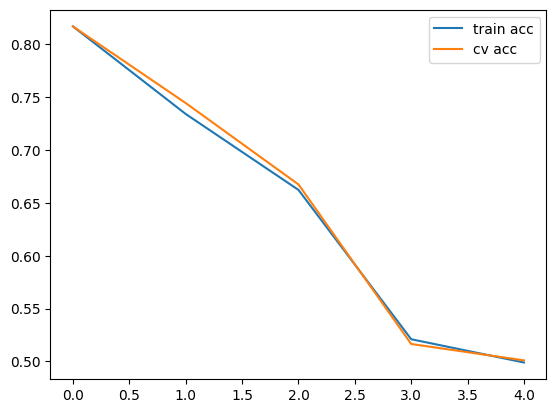

In [ ]:
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['train acc', 'cv acc'])
plt.show()

as you notice, polynomial features don't imporove performance

In [ ]:
lambdas = ['l1',  'l2', 'none']
solvers = ['liblinear',  'lbfgs', 'lbfgs']
train_acc = []
cv_acc = []

for i in range(0, 3):
  lam = lambdas[i]
  solver = solvers[i]
  model = LogisticRegression(penalty=lam, solver=solver)
  model.fit(x_train, y_train)

  train_yhat = model.predict(x_train)
  train_ac = accuracy_score(y_train, train_yhat)
  train_acc.append(train_ac)

  cv_yhat = model.predict(x_cv)
  cv_ac = accuracy_score(y_cv, cv_yhat)
  cv_acc.append(cv_ac)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


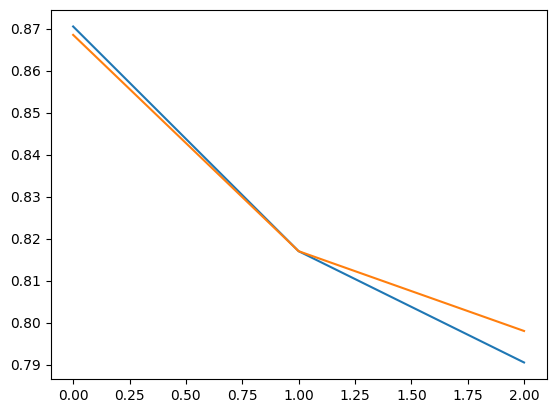

In [ ]:
plt.plot(train_acc)
plt.plot(cv_acc)
plt.show()

regularizations also decrease performace

# my best Logistic model

In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
drop_col = ['id', 'satisfaction']
x = data.drop(drop_col, axis=1)
y = data[['satisfaction']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
yhat = model.predict(x_test_scaled)
acc = accuracy_score(y_test, yhat)
print(f'accuracy {acc}')

accuracy 0.865


# the performance of diffirent classification algorithms for this problem

# SVC

In [ ]:
svc = SVC(kernel='rbf', C=1.0, gamma='scale')

svc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
train_yhat = svc.predict(x_train)
train_acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {train_acc}')

test_yhat = svc.predict(x_test)
test_acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy {test_acc}')

train accuracy 0.6465
test accuracy 0.642


# KNeighborsClassifier

In [ ]:
train_accuracy = []
test_accuracy = []

for i in range(1, 5):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  train_yhat = knn.predict(x_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_accuracy.append(train_acc)

  test_yhat = knn.predict(x_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_accuracy.append(test_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

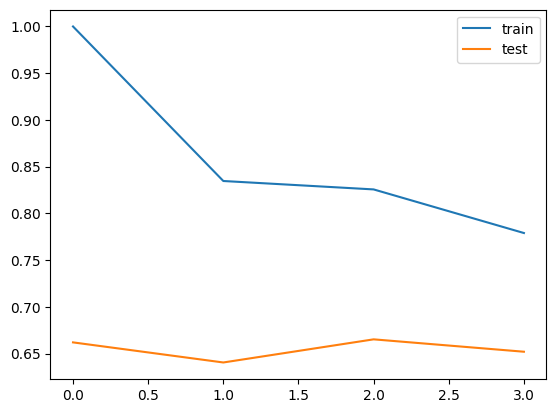

In [ ]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['train', 'test'])
plt.show()

# lgb

In [ ]:
lgb = lgb.LGBMClassifier()

lgb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier()

In [ ]:
train_yhat = lgb.predict(x_train)
train_acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {train_acc}')

test_yhat = lgb.predict(x_test)
test_acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy {test_acc}')

train accuracy 0.9961666666666666
test accuracy 0.954


In [ ]:
train_jacc = jaccard_score(y_train, train_yhat)
print(f'train jaccrad {train_jacc}')
test_jacc = jaccard_score(y_test, test_yhat)
print(f'test jaccrad {test_jacc}')

train jaccrad 0.9923740053050398
test jaccrad 0.9112825458052073


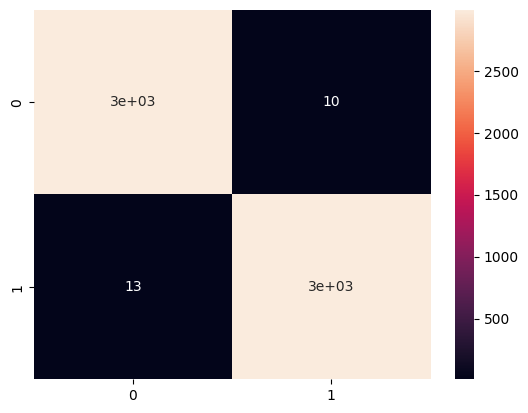

In [ ]:
sns.heatmap(confusion_matrix(y_train, train_yhat), annot=True)
plt.show()